## Import the packages

In [5]:
## import necessary packages !

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
train_data = pd.read_excel(r'C:\Users\1795426\Desktop\Data Analysis\P1_Airline_Price_Prediction/Data_Train.xlsx')

In [7]:
train_data

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


# Data Cleaning

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [9]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [10]:
train_data[train_data['Route'].isnull()]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [11]:
train_data.dropna(inplace = True)

In [12]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

## Data PreProcessing

##### The Dates in our dataset are object type and they have to be in numerical form , so we process them to convert them into numerical format

In [204]:
data_1 = train_data.copy()

In [205]:
data_1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')

In [207]:
def convert_to_datetime(col):
    data_1[col] = pd.to_datetime(data_1[col])

In [16]:
import warnings
from warnings import filterwarnings
filterwarnings('ignore')

In [208]:
for i in ['Date_of_Journey','Dep_Time','Arrival_Time']:
    convert_to_datetime(i)

In [209]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10682 non-null  object        
 1   Date_of_Journey  10682 non-null  datetime64[ns]
 2   Source           10682 non-null  object        
 3   Destination      10682 non-null  object        
 4   Route            10682 non-null  object        
 5   Dep_Time         10682 non-null  datetime64[ns]
 6   Arrival_Time     10682 non-null  datetime64[ns]
 7   Duration         10682 non-null  object        
 8   Total_Stops      10682 non-null  object        
 9   Additional_Info  10682 non-null  object        
 10  Price            10682 non-null  int64         
dtypes: datetime64[ns](3), int64(1), object(7)
memory usage: 1.2+ MB


In [19]:
data_1['Journey_date'] = data_1['Date_of_Journey'].dt.day
data_1['Journey_month'] = data_1['Date_of_Journey'].dt.month
data_1['Journey_year'] = data_1['Date_of_Journey'].dt.year

In [210]:
data_1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-11 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-11 05:50:00,2023-09-11 13:15:00,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-11 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-11 18:05:00,2023-09-11 23:30:00,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-11 16:50:00,2023-09-11 21:35:00,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-09-11 19:55:00,2023-09-11 22:25:00,2h 30m,non-stop,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-09-11 20:45:00,2023-09-11 23:20:00,2h 35m,non-stop,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-09-11 08:20:00,2023-09-11 11:20:00,3h,non-stop,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-09-11 11:30:00,2023-09-11 14:10:00,2h 40m,non-stop,No info,12648


In [21]:
def extract_hour_min(df,col):
    df[col+'_hour'] = df[col].dt.hour
    df[col+'_minute'] = df[col].dt.minute

In [211]:
for i in ['Dep_Time','Arrival_Time']:
    extract_hour_min(data_1,i)

In [212]:
data_1

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2023-09-11 22:20:00,2023-03-22 01:10:00,2h 50m,non-stop,No info,3897,22,20,1,10
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,2023-09-11 05:50:00,2023-09-11 13:15:00,7h 25m,2 stops,No info,7662,5,50,13,15
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,2023-09-11 09:25:00,2023-06-10 04:25:00,19h,2 stops,No info,13882,9,25,4,25
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,2023-09-11 18:05:00,2023-09-11 23:30:00,5h 25m,1 stop,No info,6218,18,5,23,30
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,2023-09-11 16:50:00,2023-09-11 21:35:00,4h 45m,1 stop,No info,13302,16,50,21,35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,2023-09-11 19:55:00,2023-09-11 22:25:00,2h 30m,non-stop,No info,4107,19,55,22,25
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,2023-09-11 20:45:00,2023-09-11 23:20:00,2h 35m,non-stop,No info,4145,20,45,23,20
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,2023-09-11 08:20:00,2023-09-11 11:20:00,3h,non-stop,No info,7229,8,20,11,20
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,2023-09-11 11:30:00,2023-09-11 14:10:00,2h 40m,non-stop,No info,12648,11,30,14,10


In [213]:
col_to_drop = ['Dep_Time','Arrival_Time']
data_1.drop(col_to_drop , axis =1 , inplace = True)

In [214]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Dep_Time_hour        10682 non-null  int64         
 10  Dep_Time_minute      10682 non-null  int64         
 11  Arrival_Time_hour    10682 non-null  int64         
 12  Arrival_Time_minute  10682 non-null  int64         
dtypes: datetime64[ns](1), int64(5),

In [26]:
def flight_dep_time(x):
    if (x>4) and (x<8):
        return 'Early Morning'
    elif (x>8) and (x<12):
        return 'Morning'
    elif (x>12) and (x<16):
        return 'Noon'
    elif (x>16) and (x<20):
        return 'Evening'
    elif (x>20) and (x<24):
        return 'Night'
    else:
        return 'Late Night'

<AxesSubplot:>

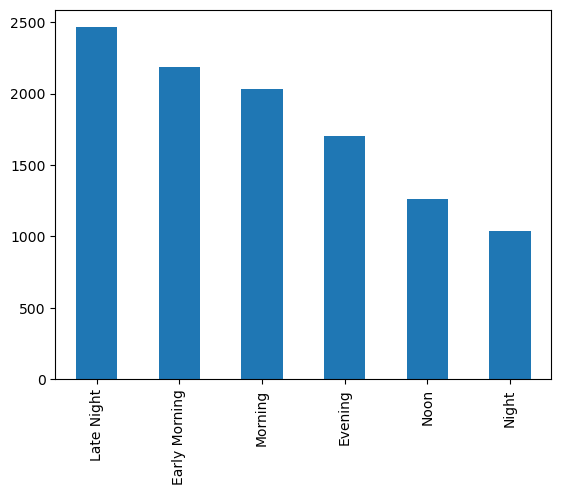

In [215]:
data_1['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind='bar')

In [83]:
def preprocess_duration(x):
    if 'h' not in x:
        x = '0h'+' '+ x
    elif 'm' not in x:
        x = x +' '+ '0m'
    
    return x
    

In [216]:
data_1['Duration'] = data_1['Duration'].apply(preprocess_duration)

In [217]:
data_1['Duration']

0        2h 50m
1        7h 25m
2        19h 0m
3        5h 25m
4        4h 45m
          ...  
10678    2h 30m
10679    2h 35m
10680     3h 0m
10681    2h 40m
10682    8h 20m
Name: Duration, Length: 10682, dtype: object

In [220]:
data_1['Duration_hrs'] = data_1['Duration'].apply(lambda x : int(x.split(' ')[0][0:-1]))

In [221]:
data_1['Duration_mins'] = data_1['Duration'].apply(lambda x : int(x.split(' ')[1][0:-1]))

In [222]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Dep_Time_hour        10682 non-null  int64         
 10  Dep_Time_minute      10682 non-null  int64         
 11  Arrival_Time_hour    10682 non-null  int64         
 12  Arrival_Time_minute  10682 non-null  int64         
 13  Duration_hrs         10682 non-

## Data Analysis

In [223]:
data_1['total_time'] = data_1['Duration_hrs']*60 + data_1['Duration_mins']

In [224]:
data_1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10682 entries, 0 to 10682
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Airline              10682 non-null  object        
 1   Date_of_Journey      10682 non-null  datetime64[ns]
 2   Source               10682 non-null  object        
 3   Destination          10682 non-null  object        
 4   Route                10682 non-null  object        
 5   Duration             10682 non-null  object        
 6   Total_Stops          10682 non-null  object        
 7   Additional_Info      10682 non-null  object        
 8   Price                10682 non-null  int64         
 9   Dep_Time_hour        10682 non-null  int64         
 10  Dep_Time_minute      10682 non-null  int64         
 11  Arrival_Time_hour    10682 non-null  int64         
 12  Arrival_Time_minute  10682 non-null  int64         
 13  Duration_hrs         10682 non-

<AxesSubplot:xlabel='total_time', ylabel='Price'>

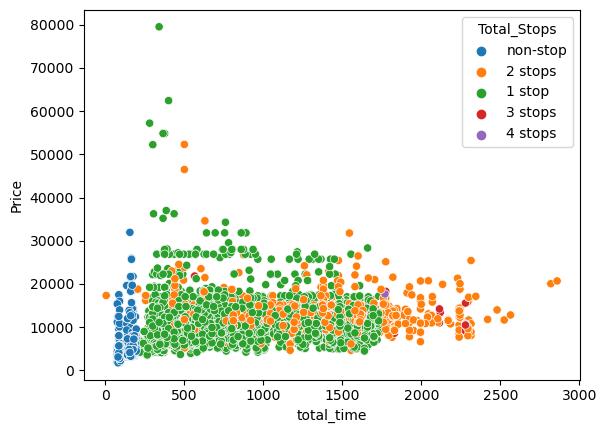

In [225]:
sns.scatterplot(x='total_time',y='Price',data =data_1,hue='Total_Stops')

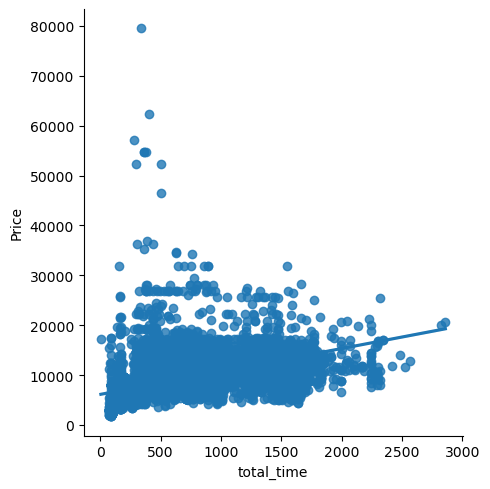

In [226]:
sns.lmplot(x='total_time',y='Price',data =data_1)

In [227]:
data_1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,total_time
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,20,1,10,2,50,170
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,50,13,15,7,25,445


In [228]:
#BiVariate Analysis
#ON WHICH ROUTE IS JET AIRWAYS MOST USED
data_1['Airline']=='Jet Airways'

0        False
1        False
2         True
3        False
4        False
         ...  
10678    False
10679    False
10680     True
10681    False
10682    False
Name: Airline, Length: 10682, dtype: bool

In [229]:
data_1[data_1['Airline']=='Jet Airways']

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,total_time
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,25,4,25,19,0,1140
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,15h 30m,1 stop,In-flight meal not included,11087,18,55,10,25,15,30,930
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,21h 5m,1 stop,No info,22270,8,0,5,5,21,5,1265
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,25h 30m,1 stop,In-flight meal not included,11087,8,55,10,25,25,30,1530
13,Jet Airways,2019-09-05,Kolkata,Banglore,CCU → BOM → BLR,12h 10m,1 stop,In-flight meal not included,9663,21,10,9,20,12,10,730
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10668,Jet Airways,2019-09-05,Delhi,Cochin,DEL → JDH → BOM → COK,7h 20m,2 stops,No info,21219,11,40,19,0,7,20,440
10672,Jet Airways,2019-06-27,Delhi,Cochin,DEL → AMD → BOM → COK,19h 55m,2 stops,In-flight meal not included,11150,23,5,19,0,19,55,1195
10673,Jet Airways,2019-05-27,Delhi,Cochin,DEL → AMD → BOM → COK,15h 0m,2 stops,No info,16704,13,25,4,25,15,0,900
10674,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,24h 45m,1 stop,In-flight meal not included,11087,20,35,21,20,24,45,1485


In [230]:
data_1[data_1['Airline']=='Jet Airways'].groupby('Route').size().sort_values(ascending= False)

Route
CCU → BOM → BLR          930
DEL → BOM → COK          875
BLR → BOM → DEL          385
BLR → DEL                382
CCU → DEL → BLR          300
BOM → HYD                207
DEL → JAI → BOM → COK    207
DEL → AMD → BOM → COK    141
DEL → IDR → BOM → COK     86
DEL → NAG → BOM → COK     61
DEL → ATQ → BOM → COK     38
DEL → COK                 34
DEL → BHO → BOM → COK     29
DEL → BDQ → BOM → COK     28
DEL → LKO → BOM → COK     25
DEL → JDH → BOM → COK     23
CCU → GAU → BLR           22
DEL → MAA → BOM → COK     16
DEL → IXC → BOM → COK     13
BLR → MAA → DEL           10
BLR → BDQ → DEL            8
DEL → UDR → BOM → COK      7
BOM → DEL → HYD            5
CCU → BOM → PNQ → BLR      4
BLR → BOM → JDH → DEL      3
DEL → DED → BOM → COK      2
BOM → BDQ → DEL → HYD      2
DEL → CCU → BOM → COK      1
BOM → VNS → DEL → HYD      1
BOM → UDR → DEL → HYD      1
BOM → JDH → DEL → HYD      1
BOM → IDR → DEL → HYD      1
BOM → DED → DEL → HYD      1
dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 [Text(0, 0, 'Jet Airways Business'),
  Text(1, 0, 'Jet Airways'),
  Text(2, 0, 'Multiple carriers'),
  Text(3, 0, 'Air India'),
  Text(4, 0, 'SpiceJet'),
  Text(5, 0, 'GoAir'),
  Text(6, 0, 'IndiGo'),
  Text(7, 0, 'Vistara'),
  Text(8, 0, 'Multiple carriers Premium economy'),
  Text(9, 0, 'Air Asia'),
  Text(10, 0, 'Vistara Premium economy'),
  Text(11, 0, 'Trujet')])

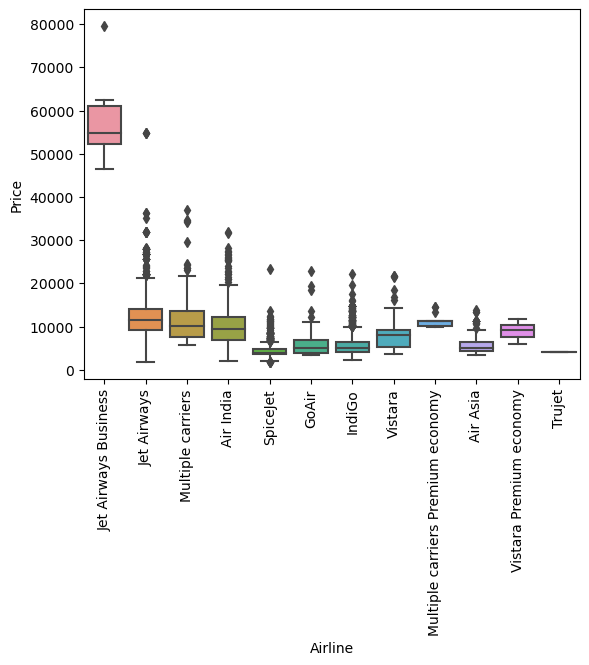

In [231]:
sns.boxplot(x='Airline',y='Price',data=data_1.sort_values('Price',ascending =False))
plt.xticks(rotation='vertical')

## Encoding 

In [232]:
data_1.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Duration', 'Total_Stops', 'Additional_Info', 'Price', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hrs', 'Duration_mins', 'total_time'],
      dtype='object')

In [234]:
cat_col = [c for c in data_1.columns if data_1[c].dtype == 'object']

In [235]:
num_col = [c for c in data_1.columns if data_1[c].dtype != 'object']

In [236]:
data_1['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [237]:
for sub_category in data_1['Source'].unique():
    data_1['Source_'+sub_category] = data_1['Source'].apply(lambda x : 1 if x == sub_category else 0)

In [238]:
data_1.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,total_time,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,1,10,2,50,170,1,0,0,0,0
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0


# Optimized feature encoding

### Target guided encoding : we assign a value to each category based on its importance in the target values

In [239]:
#Our target feature is Price
data_1.groupby(['Airline'])['Price'].mean().sort_values

<bound method Series.sort_values of Airline
Air Asia                              5590.260188
Air India                             9612.427756
GoAir                                 5861.056701
IndiGo                                5673.682903
Jet Airways                          11643.923357
Jet Airways Business                 58358.666667
Multiple carriers                    10902.678094
Multiple carriers Premium economy    11418.846154
SpiceJet                              4338.284841
Trujet                                4140.000000
Vistara                               7796.348643
Vistara Premium economy               8962.333333
Name: Price, dtype: float64>

In [240]:
airlines = data_1.groupby(['Airline'])['Price'].mean().sort_values().index

In [241]:
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [242]:
dict_airlines = {key:index for index,key in enumerate(airlines,0)}

In [246]:
data_1['Airline'] = data_1['Airline'].map(dict_airlines)

In [247]:
data_1['Airline']

0         3
1         7
2        10
3         3
4         3
         ..
10678     2
10679     7
10680    10
10681     5
10682     7
Name: Airline, Length: 10682, dtype: int64

In [248]:
data_1['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [249]:
data_1['Destination'].replace('New Delhi','Delhi', inplace = True)

In [250]:
data_1['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [251]:
dest = data_1.groupby(['Destination'])['Price'].mean().sort_values().index

In [252]:
dest

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [255]:
dict_dest = {key:index for index,key in enumerate(dest,0)}

In [256]:
dict_dest

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [257]:
data_1['Destination'] = data_1['Destination'].map(dict_dest)

In [258]:
data_1

,Airline,Date_of_Journey,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Dep_Time_hour,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,total_time,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2019-03-24,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,22,...,1,10,2,50,170,1,0,0,0,0
1,7,2019-01-05,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,5,...,13,15,7,25,445,0,1,0,0,0
2,10,2019-09-06,Delhi,4,DEL → LKO → BOM → COK,19h 0m,2 stops,No info,13882,9,...,4,25,19,0,1140,0,0,1,0,0
3,3,2019-12-05,Kolkata,3,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,18,...,23,30,5,25,325,0,1,0,0,0
4,3,2019-01-03,Banglore,2,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,16,...,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,2019-09-04,Kolkata,3,CCU → BLR,2h 30m,non-stop,No info,4107,19,...,22,25,2,30,150,0,1,0,0,0
10679,7,2019-04-27,Kolkata,3,CCU → BLR,2h 35m,non-stop,No info,4145,20,...,23,20,2,35,155,0,1,0,0,0
10680,10,2019-04-27,Banglore,2,BLR → DEL,3h 0m,non-stop,No info,7229,8,...,11,20,3,0,180,1,0,0,0,0
10681,5,2019-01-03,Banglore,2,BLR → DEL,2h 40m,non-stop,No info,12648,11,...,14,10,2,40,160,1,0,0,0,0


## Label enccoding

In [261]:
stop = {'non-stop':0, '2 stops':2, '1 stop':1, '3 stops':3, '4 stops':4}

In [269]:
data_1['Total_Stops'].map(stop)

0        0
1        2
2        2
3        1
4        1
        ..
10678    0
10679    0
10680    0
10681    0
10682    2
Name: Total_Stops, Length: 10682, dtype: int64

### Remove additional/Unnecessary columns

In [270]:
data_1['Additional_Info'].value_counts()/len(data)*(100)

No info                         78.112713
In-flight meal not included     18.554578
No check-in baggage included     2.995694
1 Long layover                   0.177869
Change airports                  0.065531
Business class                   0.037446
No Info                          0.028085
1 Short layover                  0.009362
Red-eye flight                   0.009362
2 Long layover                   0.009362
Name: Additional_Info, dtype: float64

In [276]:
data_1.drop(columns = ['Date_of_Journey','Source','Route','Total_Stops','Additional_Info'], axis= 1,inplace = True)

In [277]:
data_1.columns

Index(['Airline', 'Destination', 'Duration', 'Price', 'Dep_Time_hour',
       'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute',
       'Duration_hrs', 'Duration_mins', 'total_time', 'Source_Banglore',
       'Source_Kolkata', 'Source_Delhi', 'Source_Chennai', 'Source_Mumbai'],
      dtype='object')

In [282]:
data_1.head(2)

,Airline,Destination,Price,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hrs,Duration_mins,total_time,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,3897,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,7662,5,50,13,15,7,25,445,0,1,0,0,0


In [281]:
data_1.drop(columns = ['Duration'], axis= 1,inplace = True)

## Outlier Detection

In [290]:
def plot(df,col):
    fig,(ax1, ax2, ax3) = plt.subplots(3,1)
    sns.distplot(df[col], ax = ax1)
    sns.boxplot(df[col], ax = ax2)
    sns.distplot(df[col], ax = ax3, kde = False)

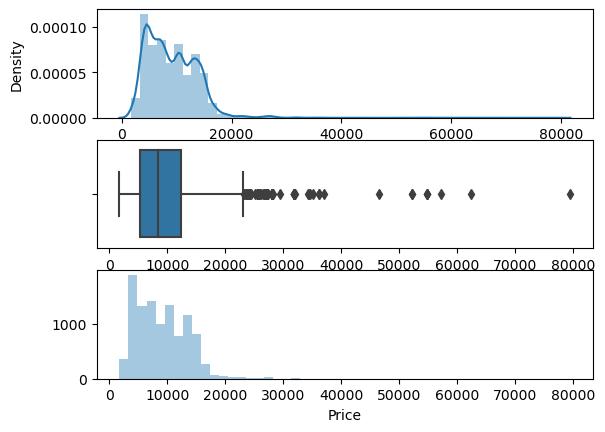

In [291]:
plot(data_1,'Price')

In [292]:
q1 = data_1['Price'].quantile(0.25)
q3 = data_1['Price'].quantile(0.75)

iqr = q3 - q1

maximum = q3+1.5*iqr
minimum = q1-1.5*iqr

In [295]:
print([price for price in data_1['Price'] if price>maximum or price<minimum])

[27430, 36983, 26890, 26890, 25139, 27210, 52229, 26743, 26890, 25735, 27992, 26890, 26890, 23583, 26890, 23533, 24115, 25735, 54826, 31783, 27992, 26890, 26890, 25430, 36235, 27210, 26890, 25735, 54826, 26890, 35185, 79512, 28097, 27992, 26890, 25735, 26092, 31825, 25913, 25735, 27992, 31825, 23267, 62427, 54826, 31825, 25430, 26890, 36235, 23843, 26890, 25735, 28322, 25735, 25735, 31825, 26890, 27992, 34273, 46490, 29528, 26890, 26890, 26890, 34503, 26890, 27992, 26890, 26890, 23170, 24528, 26890, 27992, 25735, 34608, 25703, 26890, 23528, 31825, 27282, 25735, 27992, 52285, 24017, 31945, 26890, 24318, 23677, 27992, 24210, 57209, 26890, 31825, 26480]


In [296]:
#Rplace outliers with median
data_1['Price'] = np.where(data_1['Price']>=35000 , data_1['Price'].median(),data_1['Price'])

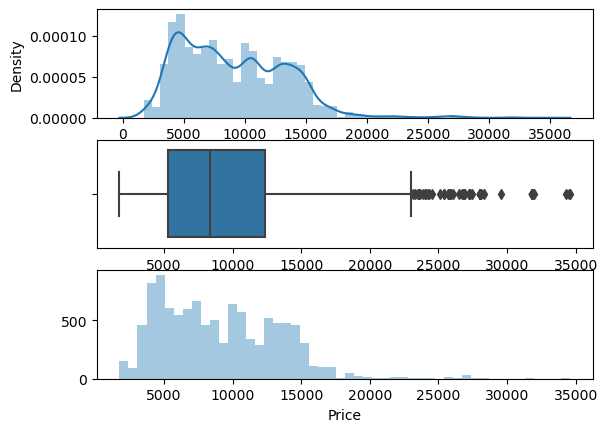

In [298]:
plot(data_1,'Price')

## Feature Selection

In [316]:
#mutual n approach 

y = data_1['Price']

x = data_1.drop(['Price'],axis=1)

In [317]:
from sklearn.feature_selection import mutual_info_regression
imp = mutual_info_regression(x,y)

In [318]:
imp_df = pd.DataFrame(imp,index = x.columns)

In [319]:
imp_df.columns = ['Importance']

In [320]:
imp_df

,Importance
Airline,0.980647
Destination,0.988987
Dep_Time_hour,0.342525
Dep_Time_minute,0.259237
Arrival_Time_hour,0.400473
Arrival_Time_minute,0.345822
Duration_hrs,0.469964
Duration_mins,0.339284
total_time,0.495482
Source_Banglore,0.403249


In [321]:
imp_df.sort_values(by = 'Importance')

,Importance
Source_Chennai,0.143299
Source_Mumbai,0.195410
Dep_Time_minute,0.259237
Duration_mins,0.339284
Dep_Time_hour,0.342525
Arrival_Time_minute,0.345822
Arrival_Time_hour,0.400473
Source_Banglore,0.403249
Source_Kolkata,0.456696
Duration_hrs,0.469964


# Model Building

In [322]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.33,random_state =42)

In [323]:
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
model.fit(x_train,y_train)

RandomForestRegressor()

In [324]:
y_pred = model.predict(x_test)

In [325]:
y_pred

array([16529.28573329,  5460.86533568,  8428.34504942, ...,
        8052.43973962,  9506.23868074,  9846.1309736 ])

In [326]:
from sklearn import metrics
metrics.r2_score(y_test,y_pred)


0.6213258144646931